In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import *

In [3]:
url = 'he.wikipedia.org/wiki/הכנסת_העשרים'
IFrame('https://' + url, 600, 600)

In [4]:
import urllib

In [6]:
tables = pd.read_html(
    "https://" + urllib.parse.quote(url),
    header=0
)

In [7]:
tables[1].head()

,מפלגה,מנהיג/ה,סימן,מושבים,קולות,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,אחוז,NaN,±,NaN,אחוז,NaN,NaN,NaN,NaN,NaN
1,הליכוד,NaN,בנימין נתניהו,מחל,30.0,25.0%,30 / 120,12א,985408.0,23.4%,NaN
2,המחנה הציוני,NaN,יצחק הרצוג,אמת,24.0,20.0%,24 / 120,3ב‏,786313.0,18.67%,NaN
3,הרשימה המשותפת,NaN,איימן עודה,ודעם,13.0,10.83%,13 / 120,2ג‏,446583.0,10.61%,NaN
4,יש עתיד,NaN,יאיר לפיד,פה,11.0,9.17%,11 / 120,8,371602.0,8.82%,NaN


In [8]:
tbl_knesset = tables[1]
column_names = [
    'מפלגה',
    'Unused',
    'מנהיג/ה',
    'סימן',
    'מושבים',
    'אחוז המושבים',
    'Unused',
    'Unused',
    'קולות',
    'אחוז הקולות'
]
tbl_knesset = tbl_knesset.iloc[:, range(len(column_names))]
tbl_knesset.columns = column_names
tbl_knesset

,מפלגה,Unused,מנהיג/ה,סימן,מושבים,אחוז המושבים,Unused,Unused,קולות,אחוז הקולות
0,NaN,אחוז,NaN,±,NaN,אחוז,NaN,NaN,NaN,NaN
1,הליכוד,NaN,בנימין נתניהו,מחל,30.0,25.0%,30 / 120,12א,985408.0,23.4%
2,המחנה הציוני,NaN,יצחק הרצוג,אמת,24.0,20.0%,24 / 120,3ב‏,786313.0,18.67%
3,הרשימה המשותפת,NaN,איימן עודה,ודעם,13.0,10.83%,13 / 120,2ג‏,446583.0,10.61%
4,יש עתיד,NaN,יאיר לפיד,פה,11.0,9.17%,11 / 120,8,371602.0,8.82%
5,כולנו,NaN,משה כחלון,כ,10.0,8.33%,10 / 120,חדשה,315360.0,7.49%
6,הבית היהודי,NaN,נפתלי בנט,טב,8.0,6.67%,8 / 120,4,283910.0,6.74%
7,"ש""ס",NaN,אריה דרעי,שס,7.0,5.83%,7 / 120,4,241613.0,5.74%
8,ישראל ביתנו,NaN,אביגדור ליברמן,ל,6.0,5.0%,6 / 120,7א,214906.0,5.1%
9,יהדות התורה,NaN,יעקב ליצמן,ג,6.0,5.0%,6 / 120,1,210143.0,4.99%


In [9]:
tbl_knesset = tbl_knesset[
    [c for c in tbl_knesset.columns if not c.startswith('U')]
].dropna()
display(tbl_knesset.head())
print(tbl_knesset.dtypes)

,מפלגה,מנהיג/ה,סימן,מושבים,אחוז המושבים,קולות,אחוז הקולות
1,הליכוד,בנימין נתניהו,מחל,30.0,25.0%,985408.0,23.4%
2,המחנה הציוני,יצחק הרצוג,אמת,24.0,20.0%,786313.0,18.67%
3,הרשימה המשותפת,איימן עודה,ודעם,13.0,10.83%,446583.0,10.61%
4,יש עתיד,יאיר לפיד,פה,11.0,9.17%,371602.0,8.82%
5,כולנו,משה כחלון,כ,10.0,8.33%,315360.0,7.49%


מפלגה            object
מנהיג/ה          object
סימן             object
מושבים          float64
אחוז המושבים     object
קולות           float64
אחוז הקולות      object
dtype: object


In [10]:
cols = [c for c in tbl_knesset.columns if 'אחוז' in c]
tbl_knesset[cols] = tbl_knesset[cols].replace({'\%': ''}, regex=True)
for c in cols:
    tbl_knesset[c] = tbl_knesset[c].astype(float)
display(tbl_knesset)
print(tbl_knesset.dtypes)

,מפלגה,מנהיג/ה,סימן,מושבים,אחוז המושבים,קולות,אחוז הקולות
1,הליכוד,בנימין נתניהו,מחל,30.0,25.00,985408.0,23.40
2,המחנה הציוני,יצחק הרצוג,אמת,24.0,20.00,786313.0,18.67
3,הרשימה המשותפת,איימן עודה,ודעם,13.0,10.83,446583.0,10.61
4,יש עתיד,יאיר לפיד,פה,11.0,9.17,371602.0,8.82
5,כולנו,משה כחלון,כ,10.0,8.33,315360.0,7.49
6,הבית היהודי,נפתלי בנט,טב,8.0,6.67,283910.0,6.74
7,"ש""ס",אריה דרעי,שס,7.0,5.83,241613.0,5.74
8,ישראל ביתנו,אביגדור ליברמן,ל,6.0,5.00,214906.0,5.10
9,יהדות התורה,יעקב ליצמן,ג,6.0,5.00,210143.0,4.99
10,מרצ,זהבה גלאון,מרצ,5.0,4.17,165529.0,3.93


מפלגה            object
מנהיג/ה          object
סימן             object
מושבים          float64
אחוז המושבים    float64
קולות           float64
אחוז הקולות     float64
dtype: object


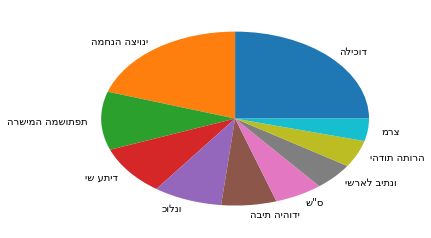

In [11]:
fig, ax = plt.subplots()
ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['מפלגה']
)
None

In [12]:
# pip install python-bidi
from bidi import algorithm as bidialg

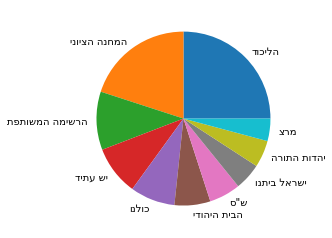

In [13]:
labels = [bidialg.get_display(l) for l in tbl_knesset['מפלגה']]
tbl_knesset['label'] = labels
fig, ax = plt.subplots()
ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['label']
)
ax.set_aspect(1.0)
None

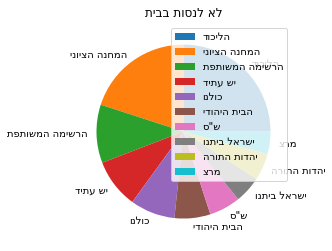

In [14]:
fig, ax = plt.subplots()
ax.set_aspect(1.0)
ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['label']
)
ax.legend()
ax.set_title(bidialg.get_display('לא לנסות בבית'))
None

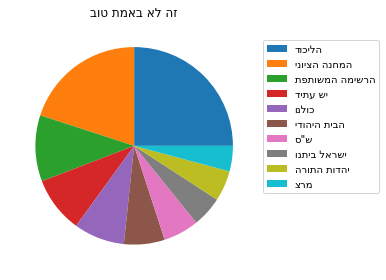

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset['מושבים']
)
ax.legend(patches, labels, bbox_to_anchor=(1.0, 0.95))
ax.set_title(bidialg.get_display('זה לא באמת טוב'))
fig.tight_layout()
None

In [16]:
tbl_knesset.sort_values('מושבים', inplace=True)

(9.89, -0.8900000000000001)

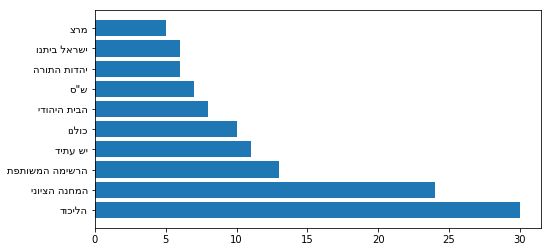

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))
y = list(range(len(tbl_knesset)))
ax.barh(
    y,
    tbl_knesset['מושבים'],
)
ax.set_yticks(y)
labels = [bidialg.get_display(row['מפלגה']) for _, row in tbl_knesset.iterrows()]
ax.set_yticklabels(labels, ha='right')
ax.set_ylim(reversed(ax.get_ylim()))

Let's see what we can do with the pie charts

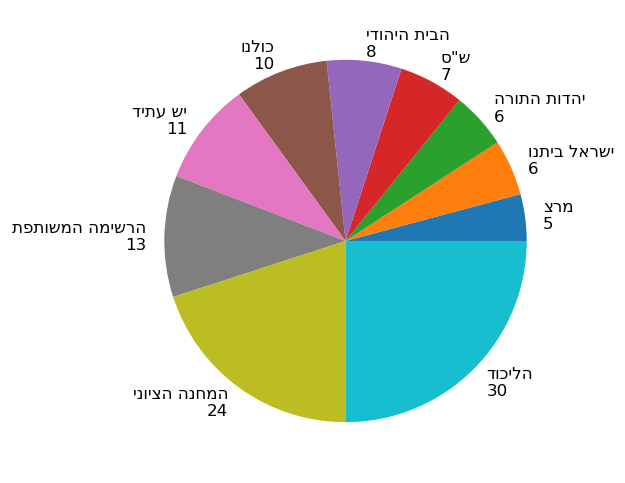

In [18]:
labels = [bidialg.get_display(row['מפלגה'] + '\n%d'%(row['מושבים'])) for _, row in tbl_knesset.iterrows()]
tbl_knesset['label'] = labels
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['label']
)
ax.set_aspect(1.0)
None

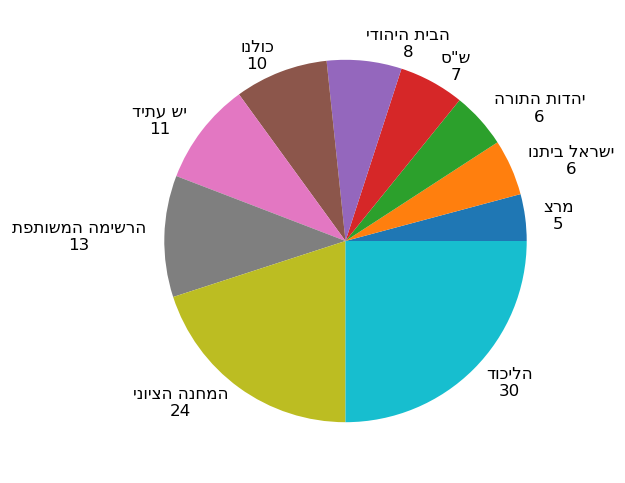

In [19]:
fig, ax = plt.subplots(figsize=(5,5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['label']
)
for t in texts:
    t.set_multialignment('center')
None

In [20]:
coalition = 'הליכוד,כולנו,הבית היהודי,ש"ס,ישראל ביתנו,יהדות התורה'.split(',')
tbl_knesset['coalition'] = tbl_knesset['מפלגה'].isin(coalition)
tbl_knesset

,מפלגה,מנהיג/ה,סימן,מושבים,אחוז המושבים,קולות,אחוז הקולות,label,coalition
10,מרצ,זהבה גלאון,מרצ,5.0,4.17,165529.0,3.93,צרמ\n5,False
8,ישראל ביתנו,אביגדור ליברמן,ל,6.0,5.00,214906.0,5.10,ונתיב לארשי\n6,True
9,יהדות התורה,יעקב ליצמן,ג,6.0,5.00,210143.0,4.99,הרותה תודהי\n6,True
7,"ש""ס",אריה דרעי,שס,7.0,5.83,241613.0,5.74,"ס""ש\n7",True
6,הבית היהודי,נפתלי בנט,טב,8.0,6.67,283910.0,6.74,ידוהיה תיבה\n8,True
5,כולנו,משה כחלון,כ,10.0,8.33,315360.0,7.49,ונלוכ\n10,True
4,יש עתיד,יאיר לפיד,פה,11.0,9.17,371602.0,8.82,דיתע שי\n11,False
3,הרשימה המשותפת,איימן עודה,ודעם,13.0,10.83,446583.0,10.61,תפתושמה המישרה\n13,False
2,המחנה הציוני,יצחק הרצוג,אמת,24.0,20.00,786313.0,18.67,ינויצה הנחמה\n24,False
1,הליכוד,בנימין נתניהו,מחל,30.0,25.00,985408.0,23.40,דוכילה\n30,True


In [21]:
cm_red = plt.get_cmap('Reds')
cm_blue = plt.get_cmap('Blues')
ix_coalition = 0
ix_opposition = 0
colors = []
for _, row in tbl_knesset.iterrows():
    if row['coalition']:
        val = ix_coalition
        cm = cm_blue
        ix_coalition += 1
    else:
        val = ix_opposition
        cm = cm_red
        ix_opposition += 1
    colors.append(cm(
             0.5 + 0.01 * row['אחוז המושבים'] 
    ))
tbl_knesset['color'] = colors

In [22]:
tbl_knesset

,מפלגה,מנהיג/ה,סימן,מושבים,אחוז המושבים,קולות,אחוז הקולות,label,coalition,color
10,מרצ,זהבה גלאון,מרצ,5.0,4.17,165529.0,3.93,צרמ\n5,False,"(0.9688119953863898, 0.3549711649365629, 0.251..."
8,ישראל ביתנו,אביגדור ליברמן,ל,6.0,5.00,214906.0,5.10,ונתיב לארשי\n6,True,"(0.3565551710880431, 0.6392925797770088, 0.814..."
9,יהדות התורה,יעקב ליצמן,ג,6.0,5.00,210143.0,4.99,הרותה תודהי\n6,True,"(0.3565551710880431, 0.6392925797770088, 0.814..."
7,"ש""ס",אריה דרעי,שס,7.0,5.83,241613.0,5.74,"ס""ש\n7",True,"(0.34646674356016915, 0.632402921953095, 0.810..."
6,הבית היהודי,נפתלי בנט,טב,8.0,6.67,283910.0,6.74,ידוהיה תיבה\n8,True,"(0.33133410226835835, 0.6220684352172241, 0.80..."
5,כולנו,משה כחלון,כ,10.0,8.33,315360.0,7.49,ונלוכ\n10,True,"(0.31115724721261057, 0.6082891195693964, 0.79..."
4,יש עתיד,יאיר לפיד,פה,11.0,9.17,371602.0,8.82,דיתע שי\n11,False,"(0.9496193771626298, 0.2798000768935025, 0.203..."
3,הרשימה המשותפת,איימן עודה,ודעם,13.0,10.83,446583.0,10.61,תפתושמה המישרה\n13,False,"(0.9437139561707035, 0.25667051134179164, 0.18..."
2,המחנה הציוני,יצחק הרצוג,אמת,24.0,20.00,786313.0,18.67,ינויצה הנחמה\n24,False,"(0.8503344867358708, 0.14686658977316416, 0.13..."
1,הליכוד,בנימין נתניהו,מחל,30.0,25.00,985408.0,23.40,דוכילה\n30,True,"(0.1271049596309112, 0.4401845444059977, 0.707..."


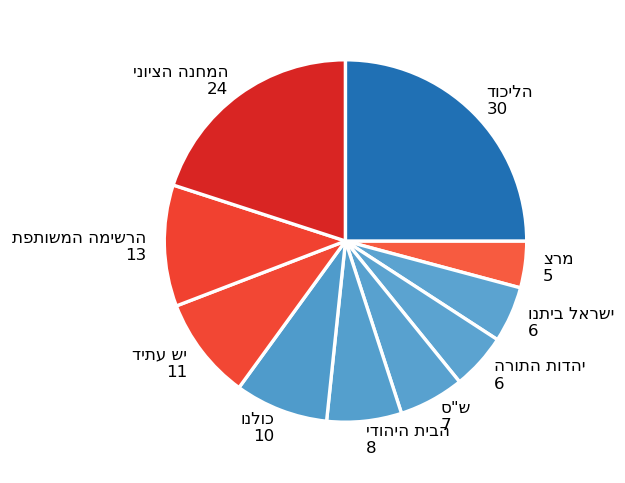

In [23]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['label'],
    colors=tbl_knesset['color'],
    counterclock=False
)
for p in patches:
    p.set_linewidth(2)
    p.set_edgecolor('white')
None

In [24]:
tbl_knesset['seats_coalition'] = tbl_knesset['מושבים']
tbl_knesset['seats_coalition'][~tbl_knesset['coalition']] *= -1

/Users/boris/devel/datascience_dataviz_workshop/dataviz-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


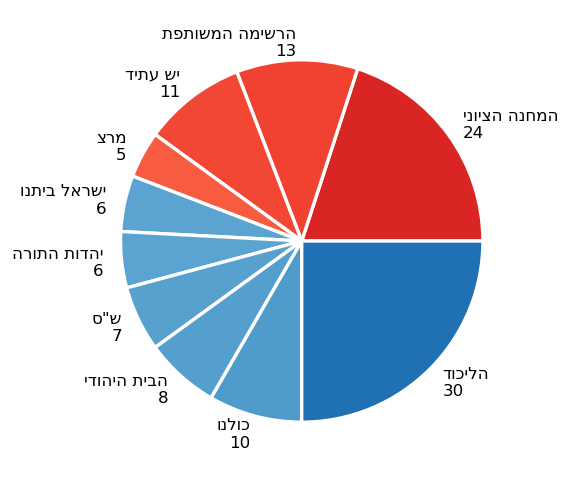

In [25]:
tbl_knesset = tbl_knesset.sort_values(
    ['coalition', 'seats_coalition'],
    ascending=[True, True]
)
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset['מושבים'],
    labels=tbl_knesset['label'],
    colors=tbl_knesset['color']
)
for p in patches:
    p.set_linewidth(2)
    p.set_edgecolor('white')
None

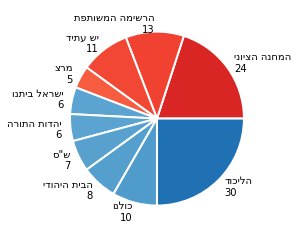

In [26]:
def my_pie(startangle, return_fig_ax=False):
    fig, ax = plt.subplots()
    ax.set_aspect(1)
    ax.set_aspect(1.0)
    patches, texts = ax.pie(
        x=tbl_knesset['מושבים'],
        labels=tbl_knesset['label'],
        colors=tbl_knesset['color'],
        startangle=startangle
    )
    for p in patches:
        p.set_linewidth(2)
        p.set_edgecolor('white')
    if return_fig_ax:
        return (fig, ax)

my_pie(0)

In [27]:
import ipywidgets as ipw
ipw.interact(my_pie, startangle=(-180.0, 180))

interactive(children=(FloatSlider(value=0.0, description='startangle', max=180.0, min=-180.0), Checkbox(value=…

<function __main__.my_pie(startangle, return_fig_ax=False)>

Text(0.5,1,'הקזח לארשיל הנתיא היצילאוק')

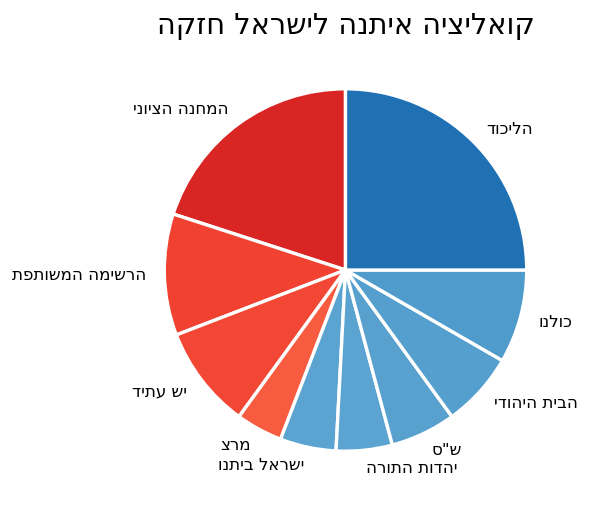

In [28]:
startangle=90
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset['מושבים'],
    labels=[bidialg.get_display(m) for m in tbl_knesset['מפלגה']],
    colors=tbl_knesset['color'],
    startangle=startangle
)
for p in patches:
        p.set_linewidth(2)
        p.set_edgecolor('white')
#ax.axvline(0, ls='--', color='gray')
ax.set_title(bidialg.get_display('קואליציה איתנה לישראל חזקה'), fontsize='xx-large')